In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path=r"C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/1)Linear Regression/Assignment Given/delivery_time.csv"
df=pd.read_csv(path)
df=df.rename(columns={"Delivery Time":"deliverytime","Sorting Time":"sortingtime"})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

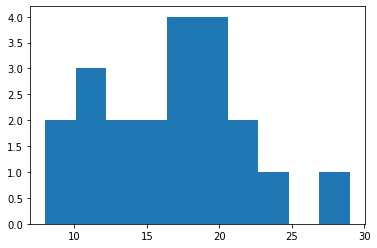

In [32]:
# y=deliverytime x=sortingtime
plt.hist(df.deliverytime)

<IPython.core.display.Javascript object>

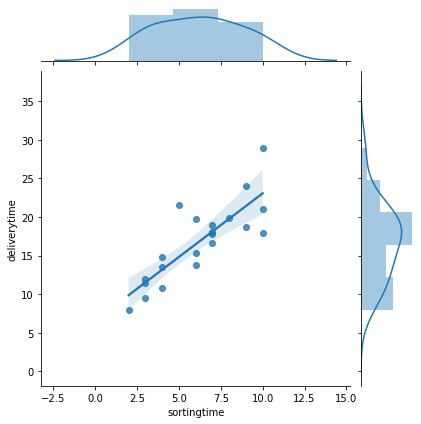

In [33]:
sns.jointplot(df.sortingtime,df.deliverytime, kind="reg" , )

<IPython.core.display.Javascript object>

{'whiskers': [<matplotlib.lines.Line2D at 0x216aea9bfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x216aeaa6908>,
 'boxes': [<matplotlib.lines.Line2D at 0x216aea9be08>],
 'medians': [<matplotlib.lines.Line2D at 0x216aeaa6ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x216aeaad9c8>],
 'means': []}

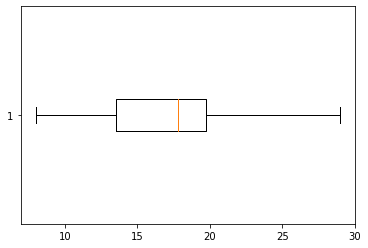

In [5]:
plt.boxplot(df.deliverytime,0,"rs",0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'deliverytime')

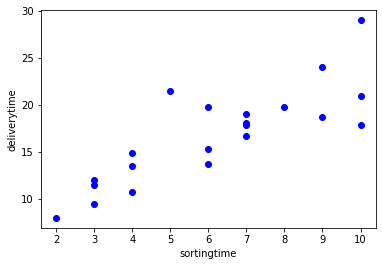

In [6]:
plt.plot(df.sortingtime,df.deliverytime,"bo");plt.xlabel("sortingtime");plt.ylabel("deliverytime")

In [7]:
# Lets correlation
df.sortingtime.corr(df.deliverytime)

0.8259972607955325

In [8]:
np.corrcoef(df.sortingtime,df.deliverytime)


<IPython.core.display.Javascript object>

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [9]:
#Model building
import statsmodels.formula.api as sfm
model =  sfm.ols("deliverytime~sortingtime",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           3.98e-06
Time:                        13:06:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
pred=model.predict(df)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [11]:
pred.corr(df.deliverytime)

0.8259972607955325

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'deliverytime')

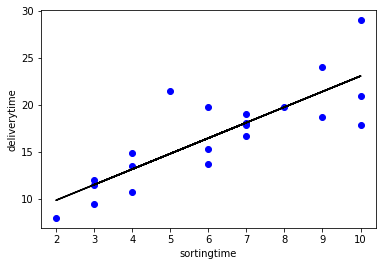

In [12]:
#Data vizualization:
plt.scatter(x=df['sortingtime'],y=df['deliverytime'],color='blue')
plt.plot(df['sortingtime'],pred,color='black')
plt.xlabel("sortingtime")
plt.ylabel("deliverytime")

In [13]:
model1 =  sfm.ols("deliverytime~np.log(sortingtime)",data=df).fit()
model1.summary()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.64e-06
Time:                        13:09:24   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
pred1=model1.predict(df)
pred1

<IPython.core.display.Javascript object>

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [15]:
pred1.corr(df.deliverytime)

0.8339325279256244

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'deliverytime')

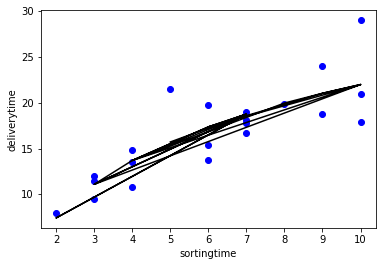

In [17]:
#Data vizualizati
plt.scatter(x=df['sortingtime'],y=df['deliverytime'],color='blue')
plt.plot(df['sortingtime'],pred1,color='black')
plt.xlabel("sortingtime")
plt.ylabel("deliverytime")

In [18]:
#Exponential transformation method
model2 =  sfm.ols("np.log(deliverytime)~sortingtime",data=df).fit()
model2.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 05 Oct 2020   Prob (F-statistic):           1.59e-06
Time:                          13:11:20   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pred2=model2.predict(df)
pred2

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [20]:
pred2.corr(df.deliverytime)

0.8259972607955327

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'deliverytime')

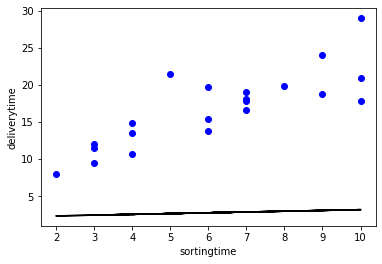

In [30]:
#Data vizualization

plt.scatter(x=df['sortingtime'],y=df['deliverytime'],color='blue')
plt.plot(df['sortingtime'],pred2,color='black')
plt.xlabel("sortingtime")
plt.ylabel("deliverytime")

In [22]:
#Quadgratic transformation method
df['sortingtime_Sq']=df.sortingtime*df.sortingtime
model3 =  sfm.ols("deliverytime~sortingtime_Sq",data=df).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.74e-05
Time:                        13:13:26   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2372      1.196      9.399      0.000       8.735      13.740
sortingtime_Sq     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pred3=model3.predict(df)
pred3



0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

In [24]:
pred3.corr(df.deliverytime)

0.79390628010028

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'sortingtime')

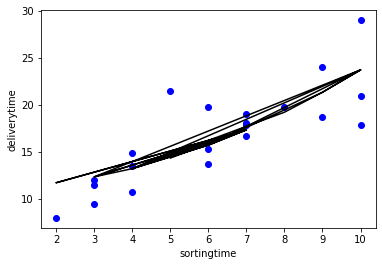

In [28]:
#Data vizualization:

plt.scatter(x=df['sortingtime'],y=df['deliverytime'],color='blue')
plt.plot(df['sortingtime'],pred3,color='black')
plt.ylabel("deliverytime")
plt.xlabel("sortingtime")